<a href="https://colab.research.google.com/github/rani-sikdar/Tensorflow-Learning/blob/main/Cat_Dog_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# unzip our zip file

In [4]:
!unzip /content/drive/MyDrive/cat_and_dog.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  infl

In [5]:
pwd

'/content'

In [6]:
training_path = "/content/training_set/training_set"
testing_path = "/content/test_set/test_set"

In [7]:
# generating random images
train_datagen = ImageDataGenerator(rescale = 1/255,
                                  horizontal_flip= True)  # re-scaling the images between 0 and 1 and image augmentation

train_datagen = ImageDataGenerator(rescale = 1/255)


In [8]:
# training on the existing dataset
training_set = train_datagen.flow_from_directory(training_path,
                                                target_size = (64,64),
                                                batch_size = 32,
                                                class_mode = "binary")

testing_set = train_datagen.flow_from_directory(testing_path,
                                                target_size = (64,64),
                                                batch_size = 32,
                                                class_mode = "binary")

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [9]:
# lets see the data

sample_train_data = next(training_set)

In [10]:
sample_train_data[0].shape # sample data has both (image, target value) so its a tuple and we have to add [0]

(32, 64, 64, 3)

In [11]:
# (32, 64, 64, 3)

# 32- images (batch_size)
# 64x64- image
# 3- RGB

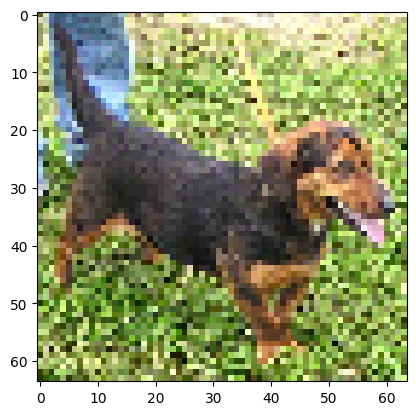

In [12]:
plt.imshow(sample_train_data[0][0])

In [13]:
# lets see the test data

sample_test_data = next(testing_set)

In [14]:
sample_test_data[0].shape

(32, 64, 64, 3)

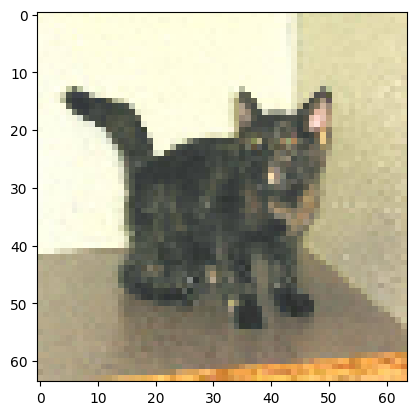

In [15]:
plt.imshow(sample_test_data[0][0])

In [16]:
# Build the architecture

classifier = Sequential()

# CL 1
classifier.add(Conv2D(32, (3,3), input_shape = (64,64,3)))
classifier.add(MaxPooling2D(pool_size = (2,2)))

# CL 1
classifier.add(Conv2D(32, (3,3)))
classifier.add(MaxPooling2D(pool_size = (2,2)))

classifier.add(Flatten())

classifier.add(Dense(128))
classifier.add(Dense(64))

classifier.add(Dense(1, activation='sigmoid')) # output - we have 2 classes so 1 neuron in op layer


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
classifier

<Sequential name=sequential, built=True>

In [18]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
classifier.fit(training_set, epochs=2, validation_data = testing_set)

Epoch 1/2


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


251/251 ━━━━━━━━━━━━━━━━━━━━ 52s 193ms/step - accuracy: 0.5851 - loss: 0.9110 - val_accuracy: 0.6718 - val_loss: 0.6113
Epoch 2/2
251/251 ━━━━━━━━━━━━━━━━━━━━ 48s 191ms/step - accuracy: 0.7046 - loss: 0.5675 - val_accuracy: 0.6970 - val_loss: 0.5800


In [27]:
# saving the model
classifier.save("cat_dog_model.h5")

In [28]:
# load the model and made prediction

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [29]:
# load the model

model_path = '/content/cat_dog_model.h5'
model = load_model(model_path)

In [30]:
# input size -> 32 x 64 x 64 x 3 -> 4 dimensions

# we have to pass exact dimension number to the model to test

image_path = '/content/drive/MyDrive/cat_or_dog-1.jpg'
test_image = image.load_img(image_path)
print(test_image)
test_image = image.img_to_array(test_image)
print(test_image.shape)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=612x531 at 0x7F570CEE7520>
(531, 612, 3)


In [31]:
# test image has size 531 x 612 but we have trained the model on 64 x 64 so we will transform the size now on test data

test_image = image.load_img(image_path, target_size=(64,64))
print(test_image)
test_image = image.img_to_array(test_image)
print(test_image.shape)

<PIL.Image.Image image mode=RGB size=64x64 at 0x7F5709747DF0>
(64, 64, 3)


In [32]:
# now one thing left which is to add batch size on the test data-

test_image = test_image.reshape(1,64,64,3)
print(test_image.shape)

(1, 64, 64, 3)


In [33]:
result =  model.predict(test_image)
print(result)
if result[0][0] == 1 : print ('cat')
else : print('dog')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
[[1.]]
cat
